## Natural Language Processing (NLP)

- this part of the notebook depicts the data preparation, but also the training of the NLP model, as well as the neural network validation 
- the data for the NLP model is loaded from the _intents_short.json_ file

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import json

with open('/content/drive/MyDrive/MedicalChatbot/intents_short.json', 'r') as f:
    intents = json.load(f)
    
intents

{'intents': [{'patterns': ['abdominal pain',
    'abdomen hurts',
    'pain in stomach',
    'pain in abdomen'],
   'tag': 'abdominal_pain'},
  {'patterns': ['abnormal menstruation',
    'heavy period',
    'Heavy flow',
    'Period lasts longer',
    'period painful',
    'strong menstrual pain',
    'Menstrual cramps strong'],
   'tag': 'abnormal_menstruation'},
  {'patterns': ['acid reflux', 'acidity problems', 'heartburn'],
   'tag': 'acidity'},
  {'patterns': ['acute liver failure',
    'liver hurts',
    'pain around liver',
    'Upper right abdomen hurts'],
   'tag': 'acute_liver_failure'},
  {'patterns': ['altered sensorium',
    "can't think clearly",
    'hard to think',
    'unable to concentrate'],
   'tag': 'altered_sensorium'},
  {'patterns': ['anxiety', 'anxious', 'really worried', 'nervous'],
   'tag': 'anxiety'},
  {'patterns': ['back hurts', 'back pain', 'pain in back'],
   'tag': 'back_pain'},
  {'patterns': ['belly hurts',
    'belly pain',
    'pain in belly',
    

In [3]:
all_words = []
tags = []
xy = []

In [25]:
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
for intent in intents['intents']:
    tag = intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        all_words.extend(w)
        xy.append( (w, tag) )

In [7]:
  xy

[(['abdominal', 'pain'], 'abdominal_pain'),
 (['abdomen', 'hurts'], 'abdominal_pain'),
 (['pain', 'in', 'stomach'], 'abdominal_pain'),
 (['pain', 'in', 'abdomen'], 'abdominal_pain'),
 (['abnormal', 'menstruation'], 'abnormal_menstruation'),
 (['heavy', 'period'], 'abnormal_menstruation'),
 (['Heavy', 'flow'], 'abnormal_menstruation'),
 (['Period', 'lasts', 'longer'], 'abnormal_menstruation'),
 (['period', 'painful'], 'abnormal_menstruation'),
 (['strong', 'menstrual', 'pain'], 'abnormal_menstruation'),
 (['Menstrual', 'cramps', 'strong'], 'abnormal_menstruation'),
 (['acid', 'reflux'], 'acidity'),
 (['acidity', 'problems'], 'acidity'),
 (['heartburn'], 'acidity'),
 (['acute', 'liver', 'failure'], 'acute_liver_failure'),
 (['liver', 'hurts'], 'acute_liver_failure'),
 (['pain', 'around', 'liver'], 'acute_liver_failure'),
 (['Upper', 'right', 'abdomen', 'hurts'], 'acute_liver_failure'),
 (['altered', 'sensorium'], 'altered_sensorium'),
 (['ca', "n't", 'think', 'clearly'], 'altered_sensori

In [8]:
# synthetic dataset created for neural network validation
xy_test = [
    (['ca', "n't", 'think', 'straight'], 'altered_sensorium'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['bloody', 'poop'], 'bloody_stool'),
    (['blurred', 'vision'], 'blurred_and_distorted_vision'),
    (['ca', "n't", 'breathe'], 'breathlessness'),
    (['Yellow', 'liquid', 'pimple'], 'yellow_crust_ooze'),
    (['lost', 'weight'], 'weight_loss'),
    (['side', 'weaker'], 'weakness_of_one_body_side'),
    (['watering', 'eyes'], 'watering_from_eyes'),
    (['brief', 'blindness'], 'visual_disturbances'),
    (['throat', 'hurts'], 'throat_irritation'),
    (['extremities', 'swelling'], 'swollen_extremeties'),
    (['swollen', 'lymph', 'nodes'], 'swelled_lymph_nodes'),
    (['dark', 'under', 'eyes'], 'sunken_eyes'),
    (['stomach', 'blood'], 'stomach_bleeding'),
    (['blood', 'urine'], 'spotting_urination'),
    (['sinuses', 'hurt'], 'sinus_pressure'),
    (['watery', 'from', 'nose'], 'runny_nose'),
    (['have', 'to', 'move'], 'restlessness'),
    (['red', 'patches', 'body'], 'red_spots_over_body'),
    (['sneeze'], 'continuous_sneezing'),
    (['coughing'], 'cough'),
    (['skin', 'patches'], 'dischromic_patches'),
    (['skin', 'bruised'], 'bruising'),
    (['burning', 'pee'], 'burning_micturition'),
    (['hurts', 'pee'], 'burning_micturition'),
    (['Burning', 'sensation'], 'burning_micturition'),
    (['chest', 'pressure'], 'chest_pain'),
    (['pain', 'butt'], 'pain_in_anal_region'),
    (['heart', 'bad', 'beat'], 'palpitations'),
    (['fart', 'lot'], 'passage_of_gases'),
    (['cough', 'phlegm'], 'phlegm'),
    (['lot', 'urine'], 'polyuria'),
    (['Veins', 'bigger'], 'prominent_veins_on_calf'),
    (['Veins', 'emphasized'], 'prominent_veins_on_calf'),
    (['yellow', 'pimples'], 'pus_filled_pimples'),
    (['red', 'nose'], 'red_sore_around_nose'),
    (['skin', 'yellow'], 'yellowish_skin'),
    (['eyes', 'yellow'], 'yellowing_of_eyes'),
    (['large', 'thyroid'], 'enlarged_thyroid'),
    (['really', 'hunger'], 'excessive_hunger'),
    (['always', 'hungry'], 'excessive_hunger'),
]

In [9]:
len(xy_test)

43

In [10]:
lemmatizer = WordNetLemmatizer()
all_words = [lemmatizer.lemmatize(w.lower()) for w in all_words if (w not in set(stopwords.words('english')) and w.isalpha())]
all_words = sorted(set(all_words))
all_words

['abdomen',
 'abdominal',
 'abnormal',
 'ache',
 'acid',
 'acidity',
 'acne',
 'acute',
 'affair',
 'alcohol',
 'also',
 'altered',
 'always',
 'anal',
 'ankle',
 'annoyed',
 'anus',
 'anxiety',
 'anxious',
 'anything',
 'appetite',
 'arm',
 'around',
 'atrophy',
 'attack',
 'back',
 'bad',
 'bag',
 'balance',
 'beat',
 'beating',
 'behind',
 'belly',
 'bigger',
 'blackhead',
 'bladder',
 'bleeding',
 'bleeds',
 'blindness',
 'blister',
 'blistered',
 'bloated',
 'blood',
 'bloody',
 'blue',
 'blurred',
 'blurry',
 'body',
 'breath',
 'breathe',
 'breathing',
 'breathlessness',
 'brief',
 'bright',
 'brittle',
 'broken',
 'brown',
 'bruise',
 'bruised',
 'bruising',
 'bump',
 'burn',
 'burning',
 'burp',
 'butt',
 'ca',
 'calm',
 'caughing',
 'change',
 'chest',
 'chill',
 'circle',
 'clearly',
 'cold',
 'color',
 'coma',
 'comfortable',
 'concentrate',
 'concentration',
 'congested',
 'congestion',
 'constantly',
 'constipated',
 'consumption',
 'contact',
 'continuous',
 'cough',
 'c

In [11]:
tags = sorted(set(tags))
tags

['abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sugar

In [2]:
def bag_of_words(tokenized_sentence, all_words):
    tokenized_sentence = [lemmatizer.lemmatize(w.lower()) for w in tokenized_sentence]
 
    bag = np.zeros(len(all_words), dtype=np.float32)
    for idx, w in enumerate(all_words):
        if w in tokenized_sentence:
            bag[idx] = 1.0
 
    return bag

In [27]:
X_train = []
y_train = []

for (pattern, tag) in xy:
    bag = bag_of_words(pattern, all_words)
    X_train.append(bag)
    
    label = tags.index(tag)
    y_train.append(label) 
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [28]:
X_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
y_train

array([  0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   2,   2,
         2,   3,   3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,
         6,   6,   6,   7,   7,   7,   7,   7,   8,   8,   8,   8,   9,
         9,   9,   9,  10,  10,  10,  10,  11,  11,  11,  12,  12,  12,
        13,  13,  13,  13,  13,  14,  14,  14,  14,  14,  15,  15,  15,
        15,  16,  16,  16,  16,  17,  17,  17,  17,  18,  18,  18,  19,
        19,  20,  20,  20,  20,  20,  21,  21,  21,  23,  23,  23,  23,
        24,  24,  24,  24,  25,  25,  25,  25,  25,  26,  26,  26,  26,
        26,  22,  22,  22,  22,  22,  27,  27,  28,  28,  28,  29,  29,
        30,  30,  30,  31,  31,  31,  31,  32,  32,  32,  32,  33,  33,
        33,  33,  34,  34,  34,  34,  34,  34,  35,  35,  35,  35,  35,
        36,  36,  37,  37,  37,  37,  38,  38,  38,  39,  39,  39,  39,
        39,  40,  40,  40,  40,  41,  41,  41,  41,  42,  42,  42,  42,
        43,  43,  43,  43,  44,  44,  44,  44,  45,  45,  45,  4

In [30]:
X_test = []
y_test = []

for (pattern, tag) in xy_test:
    bag = bag_of_words(pattern, all_words)
    X_test.append(bag)
    
    label = tags.index(tag)
    y_test.append(label) 
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [31]:
y_test

array([  4,   5,   5,  12,  13,  14, 127, 126, 124, 122, 120, 116, 114,
       110, 108, 106, 104,  98,  93,  92,  90,  25,  26,  32,  16,  17,
        17,  17,  18,  77,  79,  80,  82,  83,  84,  84,  86,  89, 130,
       129,  36,  37,  37])

In [6]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [33]:
class ChatDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.n_samples = len(X_data)
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return  self.n_samples

In [3]:
import torch.nn as nn
 
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU() 
 
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out



In [35]:
from sklearn.metrics import accuracy_score

batch_size = 8
hidden_size = 8
output_size = len(tags) 
input_size = len(all_words)
learning_rates = [0.01, 0.05, 0.1, 0.15]
num_epochs = 1000

def nn_validation():
    dataset_train = ChatDataset(X_train, y_train)
    
    train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=2)
    
    device = torch.device('cpu') 
    model = NeuralNet(input_size, hidden_size, output_size).to(device)

    loss_train = []
    loss_test = []
    
    for lr in learning_rates:
        # loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.ASGD(model.parameters(), lr=lr)

        print(f"lr: {lr}, train")
        for epoch in range(num_epochs):
            for (words, labels) in train_loader:
                words = words.to(device)
                labels = labels.to(device)

                outputs = model(words)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if (epoch + 1) % (num_epochs / 2) == 0:
                print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

        print(f'final loss = {loss.item():.4f}')
        loss_train.append(loss.item())
        
        y_predicted = []
        
        for x in X_test:
            
            x = x.reshape(1, x.shape[0])
            x = torch.from_numpy(x)

            output = model(x)
            _, predicted = torch.max(output, dim=1)
            y_pred = predicted.item()
            y_predicted.append(y_pred)
            
        
        print("y_predicted:", y_predicted)
        y_predicted = np.array(y_predicted)
  
        loss_test.append(accuracy_score(y_test, y_predicted))
        print()
    
    return loss_train, loss_test

In [36]:
train_errors, test_errors = nn_validation()

lr: 0.01, train
epoch 500/1000, loss = 0.3665
epoch 1000/1000, loss = 0.0110
final loss = 0.0110
y_predicted: [4, 71, 71, 12, 13, 22, 127, 126, 30, 122, 120, 81, 114, 110, 108, 53, 104, 98, 93, 66, 55, 25, 41, 23, 73, 24, 17, 17, 18, 77, 62, 47, 82, 83, 84, 84, 86, 89, 130, 129, 36, 37, 37]

lr: 0.05, train
epoch 500/1000, loss = 0.0046
epoch 1000/1000, loss = 0.4048
final loss = 0.4048
y_predicted: [4, 71, 71, 126, 13, 22, 86, 126, 58, 122, 120, 81, 130, 110, 108, 87, 104, 98, 93, 66, 55, 25, 26, 21, 97, 24, 17, 17, 44, 77, 40, 66, 82, 83, 115, 84, 1, 93, 130, 129, 36, 37, 37]

lr: 0.1, train
epoch 500/1000, loss = 0.0092
epoch 1000/1000, loss = 0.0210
final loss = 0.0210
y_predicted: [4, 121, 121, 12, 13, 22, 86, 126, 58, 122, 120, 81, 114, 110, 108, 11, 104, 98, 93, 66, 76, 25, 26, 21, 97, 17, 17, 17, 44, 77, 40, 66, 82, 83, 13, 84, 86, 89, 13, 129, 36, 37, 37]

lr: 0.15, train
epoch 500/1000, loss = 0.0044
epoch 1000/1000, loss = 0.0066
final loss = 0.0066
y_predicted: [4, 121, 121

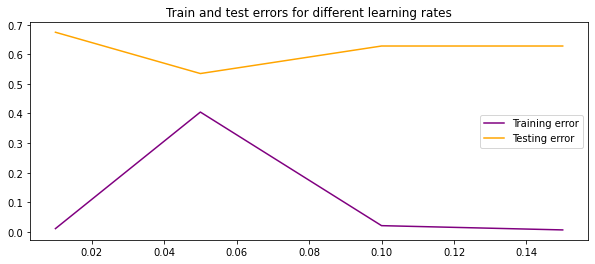

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))

plt.title("Train and test errors for different learning rates")
plt.plot(learning_rates, train_errors, c='purple', label='Training error')
plt.plot(learning_rates, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [38]:
batch_size = 8
hidden_size = 8
output_size = len(tags) 
input_size = len(all_words)
learning_rate = 0.01
num_epochs = 1000

dataset = ChatDataset(X_train, y_train)
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)

device = torch.device('cpu') 
model = NeuralNet(input_size, hidden_size, output_size).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(device)
        
        outputs = model(words)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % (num_epochs / 10) == 0:
        print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

print(f'final loss = {loss.item():.4f}')

epoch 100/1000, loss = 5.0106
epoch 200/1000, loss = 4.5932
epoch 300/1000, loss = 3.2976
epoch 400/1000, loss = 2.0579
epoch 500/1000, loss = 0.4088
epoch 600/1000, loss = 0.7171
epoch 700/1000, loss = 0.3344
epoch 800/1000, loss = 0.1658
epoch 900/1000, loss = 0.2230
epoch 1000/1000, loss = 0.0091
final loss = 0.0091


In [40]:
data = {
    "model_state": model.state_dict(),
    "input_size": input_size,
    "output_size": output_size,
    "hidden_size": hidden_size,
    "all_words": all_words,
    "tags": tags
}

FILE = "/content/drive/MyDrive/MedicalChatbot/data01.pth"
torch.save(data, FILE)

In [7]:
a=torch.load("/content/drive/MyDrive/MedicalChatbot/data.pth")
device = torch.device('cpu') 
model = NeuralNet(a['input_size'], a['hidden_size'], a['output_size']).to(device)
model.load_state_dict(a['model_state'])
model.eval()

NeuralNet(
  (l1): Linear(in_features=434, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=131, bias=True)
  (relu): ReLU()
)

In [16]:
all_words=a['all_words']
tags=a['tags']

### Symptom prediction

In [34]:
sentence = "i have a pain in my head"
sentence = nltk.word_tokenize(sentence)
X = bag_of_words(sentence, all_words)
X = X.reshape(1, X.shape[0])
X = torch.from_numpy(X)
output = model(X)
_, predicted = torch.max(output, dim=1)
tag = tags[predicted.item()]

probs = torch.softmax(output, dim=1)
prob = probs[0][predicted.item()]

print("prob:", prob)

tag

prob: tensor(0.9603, grad_fn=<SelectBackward>)


'headache'

In [35]:
len(all_words)

434